In [7]:
import scipy.io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
mat = scipy.io.loadmat('69dataset.mat')
I = mat['X']
Y = mat['Y']
X_prior = mat['prior']

In [4]:
Inorm = ((I.transpose() - np.mean(I, axis=1))/np.std(I, axis=1)).transpose()

In [5]:
Ynorm = ((Y.transpose() - np.mean(Y, axis=1))/np.std(Y, axis=1)).transpose()

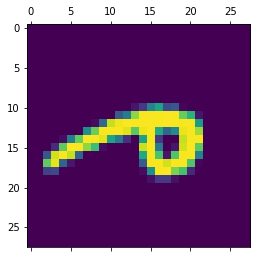

In [20]:
plt.matshow(np.reshape(I[4],(28,28)))

plt.show()

In [25]:
l = 10^-6
q = 3092
B = np.matmul(np.matmul(np.matmul(Ynorm.transpose(), Ynorm) + l * np.identity(q))^(-1), Ynorm.transpose()), Inorm)

SyntaxError: invalid syntax (<ipython-input-25-d9b2cb2b6858>, line 3)